# Face Detection Challenge

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Objectives
-  visualize images
-  preprocess images for Neural Networks
-  fit a custom CNN for a regression task
-  fine-tune a analyse model performance

## 1. Visualize images

👉 Load the dataset (200 Mo)

In [4]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/images.csv")
data

,age,pixels
0,1,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...
23700,99,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,45 108 120 156 206 197 140 180 191 199 204 207...


Each row represent the image of a face in black and white
- `age` is the age in year
- `pixels` contains the 2304 (= 48 * 48) flatten values of each pixel in the image, in a black scale from 0 to 255, stored as string

❓ Plot the histogram of age in your dataset

Text(0.5, 1.0, 'Age Distribution')

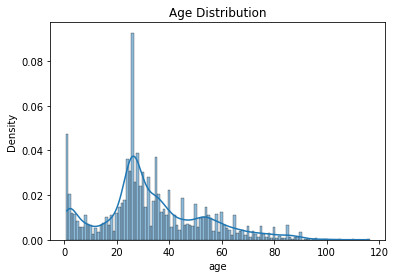

In [5]:
### TODO
sns.histplot(data.age, kde=True, stat='density', discrete=True)
plt.title("Age Distribution")

❓ Visually display one image of your choice.

In [10]:
data.iloc[1,1]

'164 74 111 168 169 171 175 182 184 188 193 199 200 199 200 196 198 192 193 188 187 186 187 188 183 182 178 177 175 174 176 174 172 165 158 153 147 142 138 131 125 120 114 110 110 111 111 104 179 70 128 171 169 171 175 182 183 187 193 197 198 196 194 189 188 185 183 184 180 182 184 178 174 173 173 173 174 174 176 171 165 160 154 149 144 139 133 129 125 119 117 113 110 112 113 108 176 71 146 169 168 171 175 177 182 185 186 187 188 191 191 186 185 181 179 178 173 174 176 169 164 168 168 169 170 171 170 165 154 148 145 141 137 134 131 130 124 121 116 112 112 112 112 109 179 77 159 172 171 171 177 180 181 182 181 179 178 178 176 179 176 173 172 173 171 170 166 164 164 165 165 166 167 163 156 144 140 133 132 134 138 139 136 133 124 121 116 112 112 112 111 111 151 81 165 171 170 170 177 178 178 180 182 180 176 169 165 168 168 164 164 163 161 161 157 152 153 158 154 150 147 145 132 128 121 130 133 143 142 142 137 133 123 120 117 114 114 114 114 116 193 93 175 173 172 173 173 168 163 165 168 1

In [74]:
def from_str_to_ndarray(string):
    ndarray = np.fromstring(string, sep=" ")
    ndarray = ndarray.reshape(48,48)
    return ndarray

In [75]:
test_picture = from_str_to_ndarray(data.iloc[0,1])

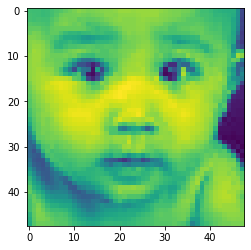

In [76]:
### TODO
plt.imshow(test_picture)

❓ What is the physical characteristic of the image at **index** `10000`?

In [77]:
picture_10000 = from_str_to_ndarray(data.iloc[10000,1])

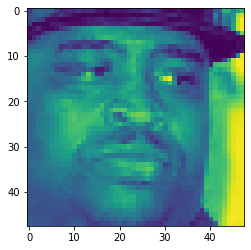

In [78]:
plt.imshow(picture_10000)

In [79]:
# Store your result in the variable below

gender = "male"
# gender = "female"

# smile = True
smile = False

In [80]:
from nbresult import ChallengeResult
result = ChallengeResult('C14',
                         gender=gender,
                         smile=smile)
result.write()

## 2. Processing

❓ Your goal is to train a convolutional neural network model to predict the age of a person based solely on a picture of his/her face.
- Create your feature matrix `X` as nparray of shape suited for a CNN, scaled between 0 and 1
- Create your target vector `y`
- Create a holdout set (`X_train`, `y_train`) (`X_test`, `y_test`) keeping `30%` in the test set, randomly sampled out of the whole dataset

😌 Don't worry, you will be given the solution in the next question in case you don't make it

In [81]:
X = data.pixels.apply(from_str_to_ndarray)

In [82]:
X = [array.reshape(48,48) for array in X]

In [83]:
X = np.array(X)

In [53]:
#from tensorflow.keras.backend import expand_dims

#X = expand_dims(X)

In [84]:
X.shape

(23705, 48, 48)

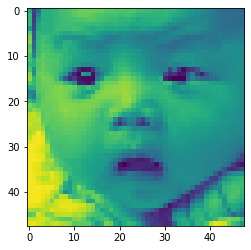

In [85]:
plt.imshow(X[1])

In [86]:
y = data.age
y

0         1
1         1
2         1
3         1
4         1
         ..
23700    99
23701    99
23702    99
23703    99
23704    99
Name: age, Length: 23705, dtype: int64

In [124]:
## YOUR CODE
from sklearn.model_selection import train_test_split

# scaling
X_scaled = X/ 255.

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [157]:
from nbresult import ChallengeResult
result = ChallengeResult('C1415', 
                         X_train_shape = X_train.shape,
                         y_train_shape = y_train.shape,
                         first_image = X_train[0]
                        )
result.write()

## Convolutional Neural Network for Age prediction

❓ Build a convolutional neural network

- Do not use transfer learning
- Store number of trainable parameters in a variable `params_number`
- Plot your metric & loss at each epoch
- make sure your model does not overfit with appropriate control techniques
- Compute the mean absolute error on your test set and store it as `mae_test`
- Compute, store and compare it with a `mae_baseline`

💡 You will not be judged by the computing power of your computer, but you should obtain significantly better performance than the baseline in less than 3 minutes, even without GPUs

👉 Feel free to start back from the solution by running the cell below (~500Mo download)

In [89]:
import pickle

file_names = ["images_X_train.pickle", "images_X_test.pickle", "images_y_train.pickle", "images_y_test.pickle"]
pickles = dict()

for file_name in file_names:
    url = f"https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/{file_name}"
    command = f"curl --output {file_name} {url}"
    ! eval {command}
    with open(file_name, 'rb') as handle:
        pickles[file_name] = pickle.load(handle)
    command = f"rm {file_name}"
    ! eval {command}
        
X_train, X_test, y_train, y_test = pickles.values()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
 79  291M   79  231M    0     0   736k      0  0:06:45  0:05:22  0:01:23  829k 0  0:06:37  0:00:19  0:06:18  781k     0  0:05:51  0:00:58  0:04:53  986k54.0M    0     0   854k      0  0:05:49  0:01:04  0:04:45  936k77k7  877k0:04:40  809k6:04  0:02:03  0:04:01  697k0M    0     0   793k      0  0:06:16  0:02:22  0:03:54  724k49  0:02:48  0:04:01  255k  715k      0  0:06:57  0:02:52  0:04:05  155k0   673k      0  0:07:23  0:03:07  0:04:16  207k0     0   666k      0  0:07:27  0:03:19  0:04:08  833k   0   683k      0  0:07:16  0:03:40  0:03:36  928k9M    0     0   694k      0  0:07:10  0:03:54  0:03:16  921k  0:06:48  0:04:40  0:02:08  678k  0     0   730k      0  0:06:49  0:04:51  0:01:58  747k
curl: (23) Failed writing body (10836 != 16384)


UnpicklingError: pickle data was truncated

In [126]:
### mae_baseline computation
av = y_test.mean()
N = len(y_test)
dif = abs(y_test - av)

mae_baseline = 1/N * dif.sum()
mae_baseline

15.159637270805153

In [127]:
### model
from tensorflow.keras import models
from tensorflow.keras import layers

def initialize_model():
    
    model = models.Sequential()
    model.add(layers.Conv2D(50, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4, activation='linear'))
    
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    
    return model

In [128]:
model = initialize_model()

In [129]:
from tensorflow.keras.backend import expand_dims

X_train_exp = expand_dims(X_train)
X_test_exp = expand_dims(X_test)

In [130]:
model

In [134]:
history = model.fit(X_train_exp, y_train,
                    validation_split=0.3,
                    verbose = 1,
                    batch_size=32,
                    epochs=100)

Epoch 1/100
363/363 [==============================] - 15s 41ms/step - loss: 151.0233 - mae: 9.4626 - val_loss: 168.0763 - val_mae: 9.9406
Epoch 2/100
363/363 [==============================] - 13s 35ms/step - loss: 149.3334 - mae: 9.3796 - val_loss: 165.3565 - val_mae: 9.6882
Epoch 3/100
363/363 [==============================] - 14s 39ms/step - loss: 144.1398 - mae: 9.2280 - val_loss: 165.2168 - val_mae: 9.9806
Epoch 4/100
363/363 [==============================] - 12s 34ms/step - loss: 139.7563 - mae: 9.0630 - val_loss: 161.1038 - val_mae: 9.6465
Epoch 5/100
363/363 [==============================] - 12s 34ms/step - loss: 138.2912 - mae: 9.0543 - val_loss: 157.4344 - val_mae: 9.5720
Epoch 6/100
363/363 [==============================] - 12s 33ms/step - loss: 133.1103 - mae: 8.8863 - val_loss: 156.1431 - val_mae: 9.5903
Epoch 7/100
363/363 [==============================] - 12s 33ms/step - loss: 132.2994 - mae: 8.8436 - val_loss: 157.9386 - val_mae: 9.5457
Epoch 8/100
363/363 [======

Epoch 60/100
363/363 [==============================] - 11s 29ms/step - loss: 46.5532 - mae: 5.2762 - val_loss: 145.9816 - val_mae: 9.2272
Epoch 61/100
363/363 [==============================] - 11s 30ms/step - loss: 46.1948 - mae: 5.2728 - val_loss: 147.7748 - val_mae: 9.2258
Epoch 62/100
363/363 [==============================] - 11s 30ms/step - loss: 45.3887 - mae: 5.2305 - val_loss: 148.6009 - val_mae: 9.2183
Epoch 63/100
363/363 [==============================] - 11s 30ms/step - loss: 44.0248 - mae: 5.1378 - val_loss: 148.0915 - val_mae: 9.2748
Epoch 64/100
363/363 [==============================] - 11s 29ms/step - loss: 43.5049 - mae: 5.1116 - val_loss: 146.5239 - val_mae: 9.2414
Epoch 65/100
363/363 [==============================] - 11s 30ms/step - loss: 42.9632 - mae: 5.0897 - val_loss: 148.1923 - val_mae: 9.3332
Epoch 66/100
363/363 [==============================] - 11s 30ms/step - loss: 41.7315 - mae: 5.0121 - val_loss: 149.1112 - val_mae: 9.3180
Epoch 67/100
363/363 [=====

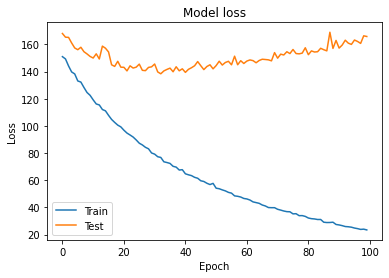

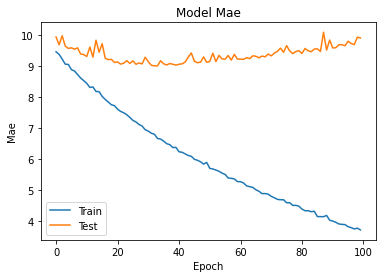

In [140]:
def plot_loss_mae(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model Mae')
    plt.ylabel('Mae')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    
### YOUR CODE HERE

plot_loss_mae(history)

In [142]:
## computing mae_test

y_pred = model.predict(X_test_exp)
y_pred

array([[34.286182 , 34.301548 , 34.313957 , 34.29634  ],
       [47.401974 , 47.458736 , 47.440723 , 47.487625 ],
       [35.241127 , 35.155582 , 35.145687 , 35.181927 ],
       ...,
       [ 5.6186686,  5.6453648,  5.588662 ,  5.6501565],
       [45.281982 , 45.29998  , 45.27443  , 45.311337 ],
       [27.71639  , 27.715826 , 27.730368 , 27.771727 ]], dtype=float32)

In [144]:
y_predict = [pred.mean() for pred in y_pred]
y_predict

[34.299507,
 47.447266,
 35.181084,
 16.84123,
 75.64348,
 2.6020265,
 56.88479,
 48.000145,
 43.832542,
 24.261482,
 47.35653,
 30.581335,
 56.01685,
 13.334403,
 34.169304,
 24.048353,
 31.107697,
 18.827078,
 44.217087,
 21.018692,
 27.322397,
 7.01321,
 92.77902,
 18.432306,
 20.590012,
 34.120796,
 14.733011,
 46.7676,
 18.16679,
 22.231861,
 35.242004,
 31.703243,
 18.94081,
 30.28549,
 28.150618,
 42.424866,
 51.478935,
 65.09044,
 47.784874,
 18.458939,
 23.693645,
 95.05117,
 28.890146,
 -5.6943517,
 30.502237,
 12.342168,
 42.216385,
 13.79774,
 36.851566,
 50.319893,
 22.957878,
 47.29143,
 39.16472,
 17.978859,
 56.366676,
 29.725653,
 38.612617,
 60.29754,
 5.9645257,
 53.518085,
 6.518527,
 20.857388,
 39.618134,
 23.750824,
 29.944874,
 50.36555,
 33.112267,
 8.321924,
 50.566,
 14.084822,
 26.134758,
 18.448605,
 79.114204,
 54.667366,
 35.283035,
 24.598993,
 48.498688,
 66.53137,
 20.515032,
 40.826874,
 51.504097,
 58.243217,
 44.91111,
 18.950066,
 31.170597,
 29.74

In [145]:
dif_model = abs(y_predict - y_test)

mae_test = 1/N * dif_model.sum()
mae_test

9.700827986976243

In [148]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, restore_best_weights=True)

In [151]:
model_2 = initialize_model()

history_2 = model_2.fit(X_train_exp, y_train,
                    validation_split=0.3,
                    verbose = 1,
                    batch_size=32,
                    epochs=80,
                    callbacks=[es])

Epoch 1/80
363/363 [==============================] - 13s 34ms/step - loss: 485.9293 - mae: 16.7301 - val_loss: 268.6100 - val_mae: 12.9568
Epoch 2/80
363/363 [==============================] - 14s 38ms/step - loss: 250.9285 - mae: 12.1426 - val_loss: 236.7115 - val_mae: 11.6027
Epoch 3/80
363/363 [==============================] - 14s 40ms/step - loss: 226.2675 - mae: 11.6470 - val_loss: 218.8238 - val_mae: 11.1650
Epoch 4/80
363/363 [==============================] - 13s 36ms/step - loss: 210.3296 - mae: 11.1761 - val_loss: 201.9264 - val_mae: 10.8362
Epoch 5/80
363/363 [==============================] - 13s 36ms/step - loss: 201.0664 - mae: 10.9363 - val_loss: 194.0534 - val_mae: 10.6557
Epoch 6/80
363/363 [==============================] - 13s 37ms/step - loss: 195.4170 - mae: 10.7810 - val_loss: 208.2384 - val_mae: 11.4519
Epoch 7/80
363/363 [==============================] - 12s 33ms/step - loss: 179.9775 - mae: 10.3494 - val_loss: 184.3602 - val_mae: 10.3878
Epoch 8/80
363/363 [

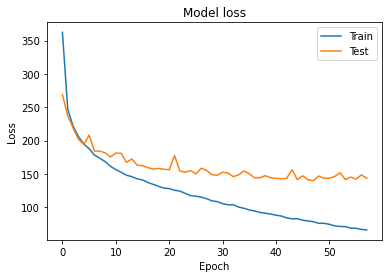

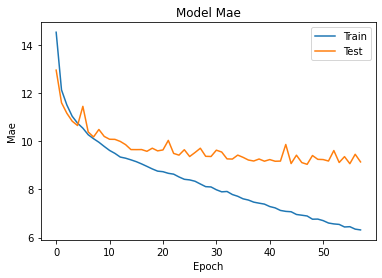

In [152]:
plot_loss_mae(history_2)

In [153]:
## mae_test_2 

y_pred_2 = model_2.predict(X_test_exp)
y_predict_2 = [pred.mean() for pred in y_pred_2]

dif_model_2 = abs(y_predict_2 - y_test)

mae_test_2 = 1/N * dif_model_2.sum()
mae_test_2

8.895123791311008

In [154]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 46, 46, 50)        500       
_________________________________________________________________
flatten_4 (Flatten)          (None, 105800)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 423204    
Total params: 423,704
Trainable params: 423,704
Non-trainable params: 0
_________________________________________________________________


In [155]:
params_number = 423704

In [156]:
from nbresult import ChallengeResult
result = ChallengeResult('C1516',
                         params_number=params_number,
                         mae_baseline = mae_baseline,
                         mae_test = mae_test,
                        )
result.write()